In [0]:
!pip install tbcontrol
!pip install control

# Step 1 : Transfer function



     1
-----------
s^2 + s + 1



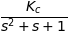

In [142]:
import sympy
from sympy import degree
from sympy import poly
from tbcontrol.symbolic import routh
from sympy import diff , solve,nsimplify
import math
import control as c

sympy.init_printing()

s = sympy.Symbol('s')
K_c, t = sympy.symbols('K_c, t', positive=True)
GH = 1/((s**2 + s+1))

G_p = K_c*GH

s = c.TransferFunction.s
transfer_function = 1/((s**2 + s+1)) 
print(transfer_function)
s = sympy.Symbol('s')
nsimplify(G_p)

# Step 2 :  Xfer Function Info


In [35]:
forward = G_p
backward = 1

G_CL = backward*forward/(1 + forward*backward)
sympy.simplify(G_CL)
ce = sympy.denom(G_CL.simplify())
Poly_ce = poly(ce,s)
poly(ce,s)

# Step 3 :  Completed Root Locus


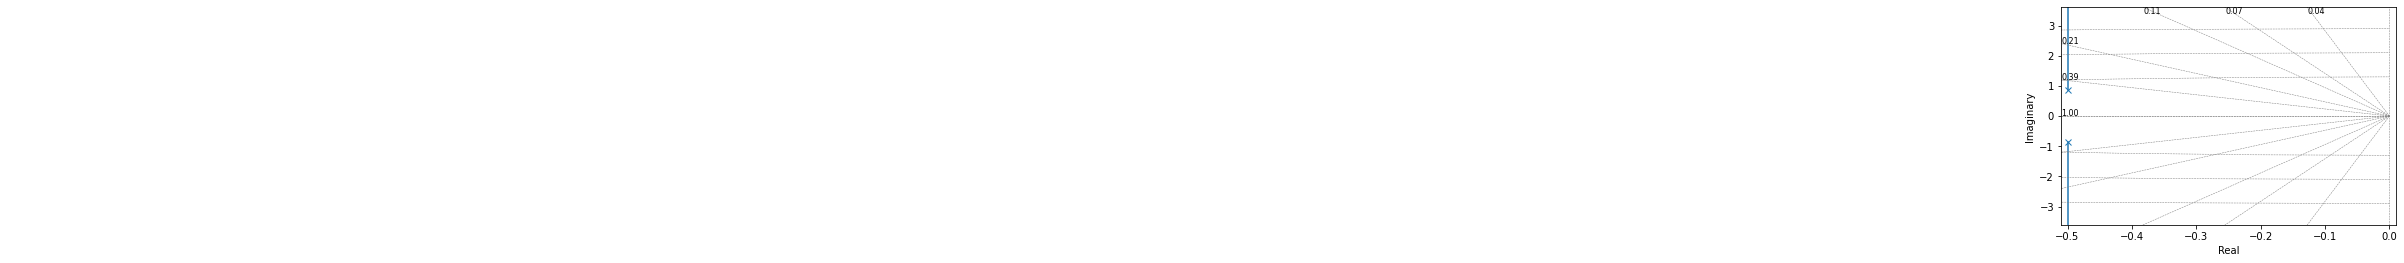

In [139]:

p1 = c.rlocus(transfer_function) # compute root locus
plt.show()

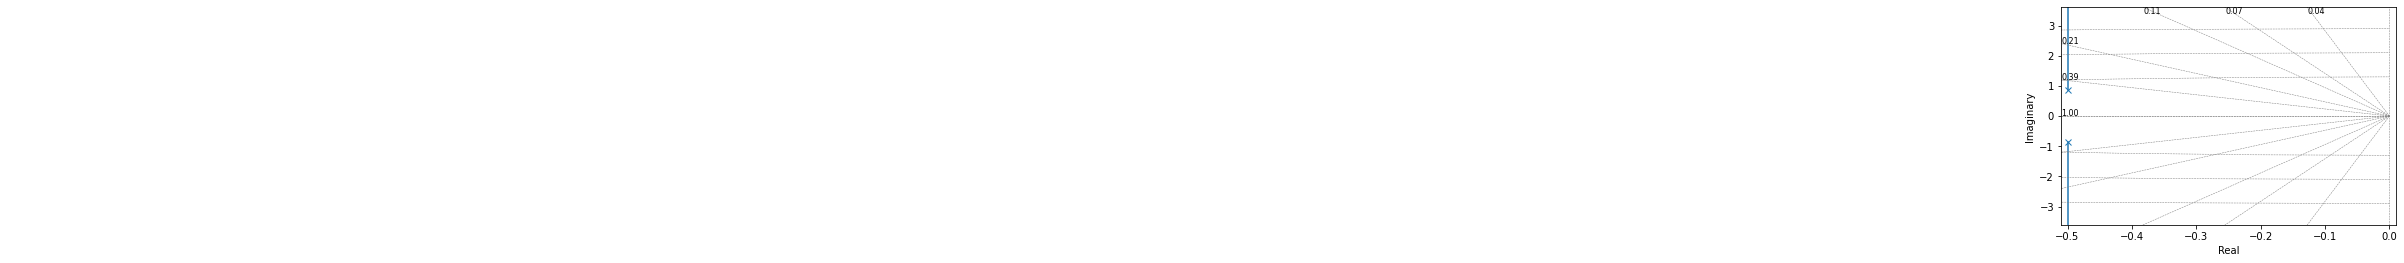

In [141]:
p1 = c.root_locus(transfer_function)

# Step 4 :  Number of Branches


In [37]:
Pole = c.pole(transfer_function)
Zero = c.zero(transfer_function)
print("poles :‌ ",Pole)
print("Zeros ‌: ",Zero)
print("Number of branch :‌ ", len(Pole))

poles :‌  [-3. -2.  0.]
Zeros ‌:  []
Number of branch :‌  3


# Step 5 :  Start/End Points

Root locus starts (K=0) at poles of open loop transfer function, G(s)H(s).  These are shown by an "x" on the diagram above


In [38]:
print("we have we also have q=n-m=",len(Pole)-len(Zero)," zero at infinity. (We have n=",len(Pole),"finite poles, and m=",len(Zero)," finite zero).")

we have we also have q=n-m= 3  zero at infinity. (We have n= 3 finite poles, and m= 0  finite zero).


# Step 6 :  Asymptotes as |s| goes to infinity

<figure>
<center>
<img src='https://github.com/ali493/ControlNise/blob/master/Screenshot%20from%202020-06-13%2020-36-33.png?raw=true' />
</figure>


In [45]:
from sympy import nsimplify
sigma_a = (sum(Pole)-sum(Zero))/(len(Pole)-len(Zero))
m=np.linspace(0,(len(Pole)-len(Zero))+1,(len(Pole)-len(Zero)))
pi = sympy.symbols('pi', positive=True)
theta_a = ((2*m+1)*pi)/(len(Pole)-len(Zero))
nsimplify(sigma_a)


In [46]:
nsimplify(theta_a)

⎡π  5⋅π     ⎤
⎢─  ───  3⋅π⎥
⎣3   3      ⎦

# Step 7 : Break-Out and In Points on Real Axis

<figure>
<center>
<img src='https://github.com/ali493/ControlNise/blob/master/Screenshot%20from%202020-06-13%2021-28-25.png?raw=true' />
</figure>


In [63]:
K = sympy.symbols('K', positive=True)
sigma = sympy.symbols(r'\sigma')
K = -1 / GH
K = K.subs(s, sigma)
nsimplify(K)

Differentiating K with respect to σ and setting the derivative equal to zero yields


In [68]:
diff_sigma = diff(K,sigma)
diff_sigma

In [69]:
solve(diff_sigma)

# Step 8 : Cross Imag. Axis


In [70]:
ce = sympy.denom(G_CL.simplify())
Poly_ce = poly(ce,s)
A = routh(Poly_ce)
routh(Poly_ce)

⎡    1       6 ⎤
⎢              ⎥
⎢    5      K_c⎥
⎢              ⎥
⎢  K_c         ⎥
⎢- ─── + 6   0 ⎥
⎢   5          ⎥
⎢              ⎥
⎣   K_c      0 ⎦

In [78]:
f= sympy.solve([e > 0 for e in A[:, 0]], K_c)
Kf = (f.args[1])
Poly_ce.subs(K_c, Kf)
solve(Poly_ce.subs(K_c, Kf))

# Step 9 : Changing K Changes Closed Loop Poles


In [79]:
Kf = 4.008
Poly_ce.subs(K_c, Kf)
solve(Poly_ce.subs(K_c, Kf))

# Step 10 : Choose Pole Location and Find K


In [83]:
pole = -4+2j
K = sympy.symbols('K', positive=True)
sigma = sympy.symbols(r'\sigma')
K = -1 / GH
nsimplify(K.subs(s, pole))

# Step 11 : Angle of Departure

<figure>
<center>
<img src='https://github.com/ali493/ControlNise/blob/master/Screenshot%20from%202020-06-14%2001-11-35.png?raw=true' />
</figure>

<figure>
<center>
<img src='https://github.com/ali493/ControlNise/blob/master/Screenshot%20from%202020-06-14%2001-11-15.png?raw=true' />
</figure>


This condition occur when we confront with complex pole

In [127]:
Pole = c.pole(transfer_function)
Zero = c.zero(transfer_function)
Pole = np.around((np.array(Pole)), decimals=5)
Angle_De = np.zeros(len(Pole))
for i in range(len((Pole))):
    if np.count_nonzero(Pole[i].imag) > 0 :
        angleP = []
        for p in Pole:
            angleP.append(cmath.phase(p - Pole[i]))
        Angle_Pole = sum(angleP)
        angleZ = []
        for z in Zero:
            angleP.append(cmath.phase(z - Pole[i]))
        Angle_Zero = sum(angleZ)
        Angle = math.degrees(Angle_Zero - Angle_Pole) - 180
    
        
    else :
        Angle = 0
        print("No complex poles in loop gain, so no angles of departure.")
    Angle_De[i] = Angle

print('Angle of Departure : ',(Angle_De))


Angle of Departure :  [ -90. -270.]


# Step 12 : Angle of Arrival

<figure>
<center>
<img src='https://github.com/ali493/ControlNise/blob/master/Screenshot%20from%202020-06-14%2001-11-46.png?raw=true' />
</figure>

<figure>
<center>
<img src='https://github.com/ali493/ControlNise/blob/master/Screenshot%20from%202020-06-14%2001-11-10.png?raw=true' />
</figure>


This condition occur when we confront with complex zero

In [128]:
Pole = c.pole(transfer_function)
Zero = c.zero(transfer_function)
Pole = np.around((np.array(Pole)), decimals=5)
Angle_Ar = np.zeros(len(Zero))
for i in range(len((Zero))):
    if np.count_nonzero(Zero[i].imag) > 0 :
        angleP = []
        for p in Pole:
            angleP.append(cmath.phase(p - Zero[i]))
        Angle_Pole = sum(angleP)
        angleZ = []
        for z in Zero:
            angleP.append(cmath.phase(z - Zero[i]))
        Angle_Zero = sum(angleZ)
        Angle = math.degrees(Angle_Pole - Angle_Zero ) + 180
    
        
    else :
        Angle = 0
        
    Angle_De[i] = Angle

print('Angle of Arival : ',(Angle_Ar))


Angle of Arival :  []
